## Import Libraries

In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler

## Importing Datasets

In [129]:
data = pd.read_csv('datasets/train.csv')
stores = pd.read_csv('datasets/stores.csv')
features = pd.read_csv('datasets/features.csv')

### Train Data

In [130]:
data.shape

(421570, 5)

In [131]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### Stores Data

In [133]:
stores.shape

(45, 3)

In [134]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [135]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Feature Data

In [136]:
features.shape

(8190, 12)

In [137]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [138]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Handling Missing Values of Features Dataset

In [139]:
features['CPI'].fillna(features['CPI'].median(), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(), inplace=True)

In [140]:
for i in range(1, 6):
    features['MarkDown'+str(i)] = features['MarkDown'+str(i)].apply(lambda x: 0 if x < 0 else x)
    features['MarkDown'+str(i)].fillna(value=0, inplace=True)

In [141]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Merging Train, Stores & Features Dataset

In [142]:
data = pd.merge(data, stores, on='Store', how='left')

In [143]:
data = pd.merge(data, features, on=['Store','Date'], how='left')

In [144]:
data['Date'] = pd.to_datetime(data['Date'])

In [145]:
data.sort_values(by=['Date'], inplace=True)

In [146]:
data.set_index(data.Date, inplace=True)

In [147]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [148]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [149]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [150]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


## Splitting Date Column

In [151]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [152]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


In [153]:
data.tail()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,26
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,26
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,26
2012-10-26,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,26
2012-10-26,45,98,2012-10-26,1076.80,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,2012,10,26


## Otlier Detection & Abnormalities

In [154]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max','min','mean','median','std']).reset_index()
agg_data

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.480,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.850,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.850,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.960,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.420,11330.286495
...,...,...,...,...,...,...,...
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542


In [155]:
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [156]:
store_data = pd.merge(left=data, right=agg_data, on=['Store', 'Dept'], how='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [157]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'], inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Day,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [158]:
data['Total_MarkDown'] = data['MarkDown1'] + data['MarkDown2'] + data['MarkDown3'] + data['MarkDown4'] + data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace=True)

In [159]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [160]:
data.shape

(421533, 20)

In [161]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis=1)]
data.shape

(375438, 20)

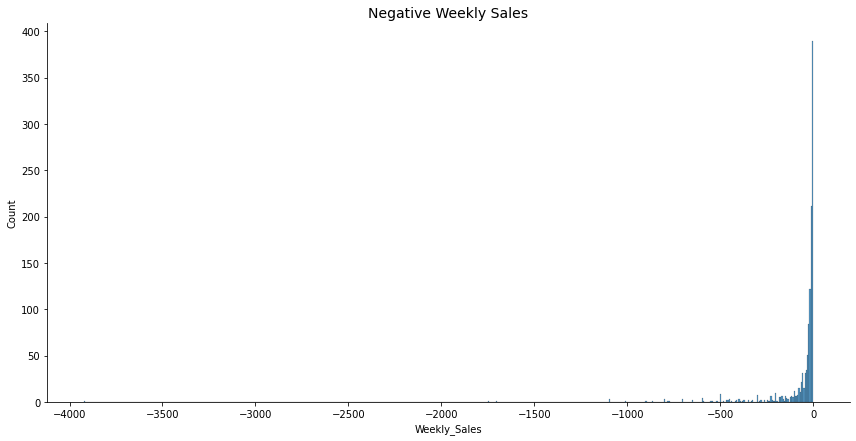

In [162]:
# Negative Weekly Sales

y = data['Weekly_Sales'][data.Weekly_Sales < 0]
sns.displot(y, height=6, aspect=2)
plt.title("Negative Weekly Sales", fontsize=14);

In [163]:
data = data[data["Weekly_Sales"] >= 0]

In [164]:
data.shape

(374247, 20)

In [165]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           374247 non-null  int64         
 1   Dept            374247 non-null  int64         
 2   Date            374247 non-null  datetime64[ns]
 3   Weekly_Sales    374247 non-null  float64       
 4   Type            374247 non-null  object        
 5   Size            374247 non-null  int64         
 6   Temperature     374247 non-null  float64       
 7   Fuel_Price      374247 non-null  float64       
 8   CPI             374247 non-null  float64       
 9   Unemployment    374247 non-null  float64       
 10  IsHoliday       374247 non-null  int32         
 11  Year            374247 non-null  int64         
 12  Month           374247 non-null  int64         
 13  Day             374247 non-null  int64         
 14  max             3742

In [167]:
data.to_csv('./datasets/preprocessed_walmart_dataset.csv')

## Data Visualization

### Average Monthly Sales

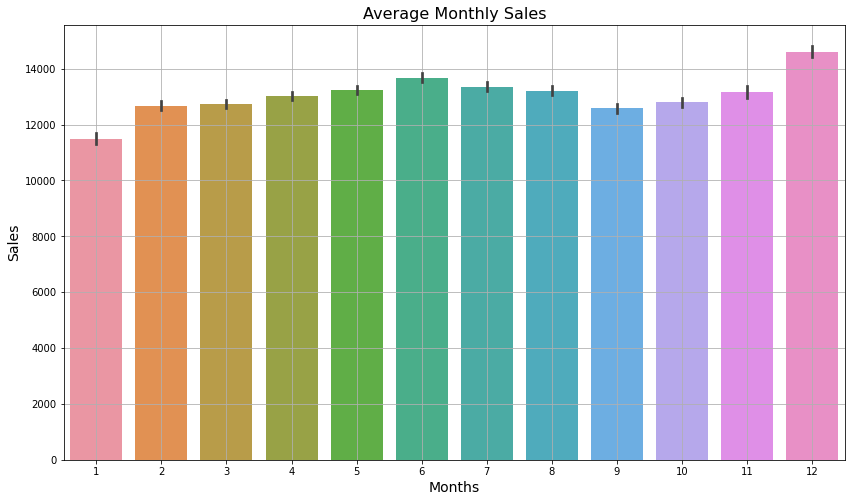

In [168]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Month", y="Weekly_Sales", data=data)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Average Monthly Sales", fontsize=16)
plt.grid();

### Monthly Sales for Each Year

In [169]:
data_monthly = pd.crosstab(data['Year'], data['Month'], values=data['Weekly_Sales'], aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


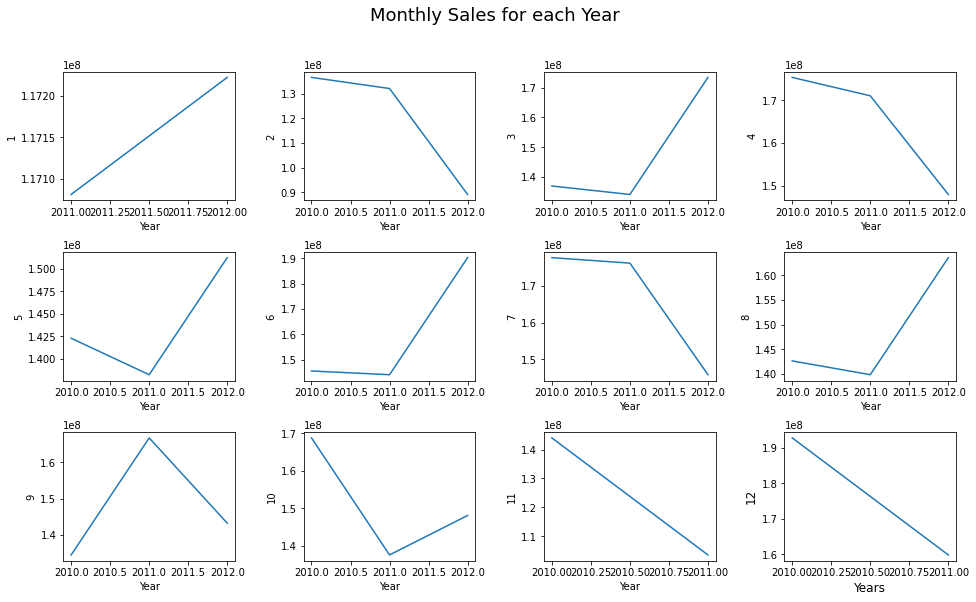

In [170]:
fig, axes = plt.subplots(3,4,figsize=(16,9))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.4)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show();

### Average Weekly Sales Store wise

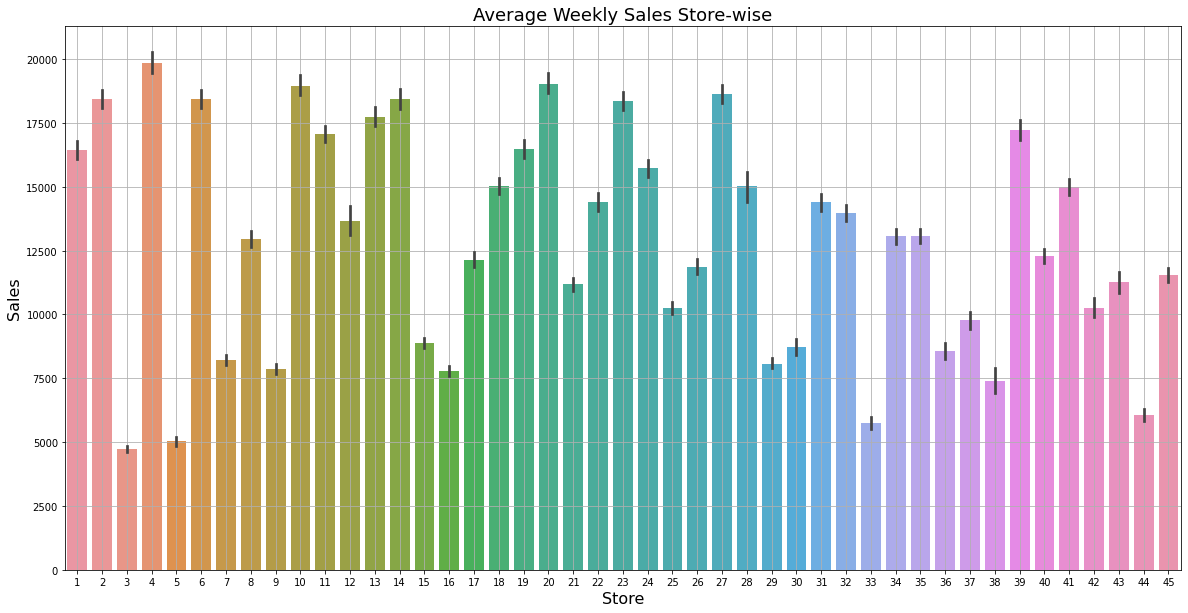

In [171]:
plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.grid()
plt.title("Average Weekly Sales Store-wise", fontsize=18)
plt.xlabel("Store", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.show();

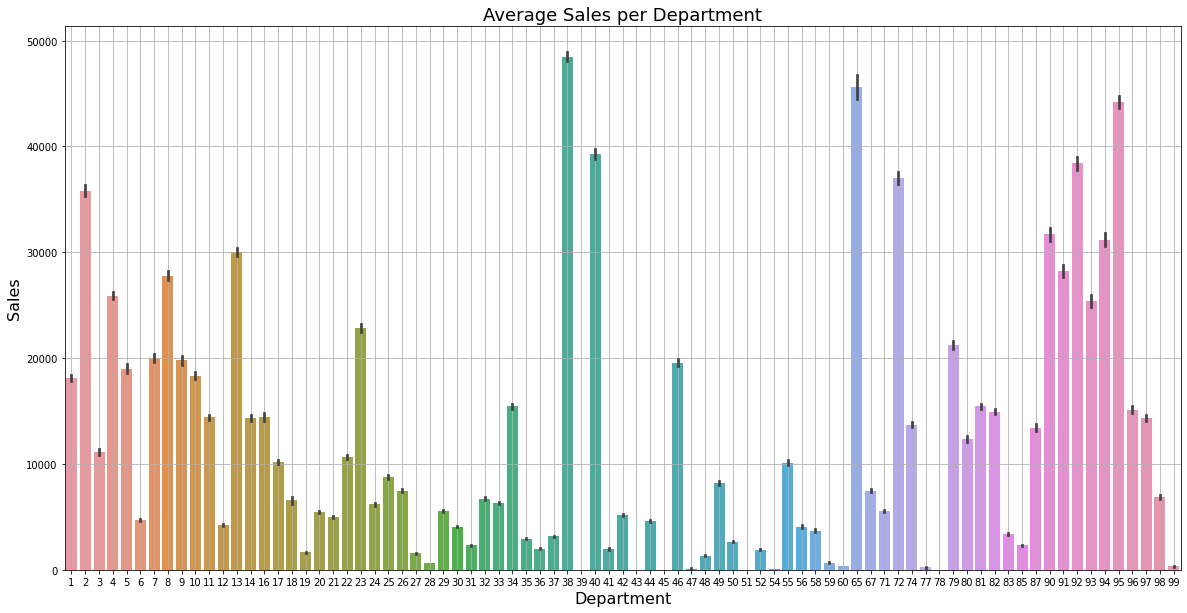

In [172]:
plt.figure(figsize=(20,10))
sns.barplot(x='Dept', y='Weekly_Sales', data=data)
plt.grid()
plt.title("Average Sales per Department", fontsize=18)
plt.xlabel("Department", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.show();

### Sales vs. Temparature

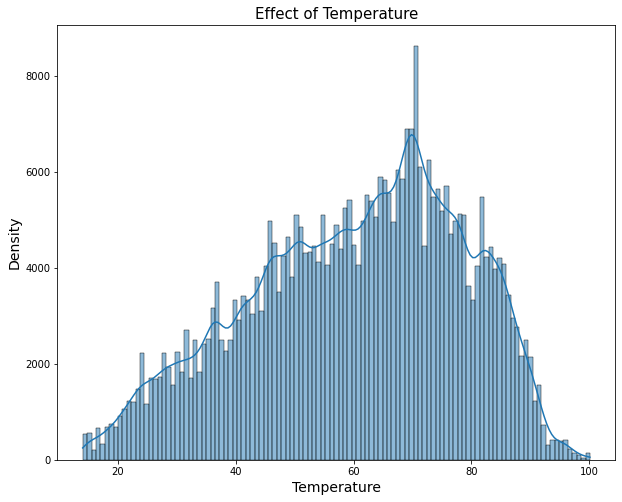

In [173]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Temperature', kde=True)
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show();

### Holiday Distribution

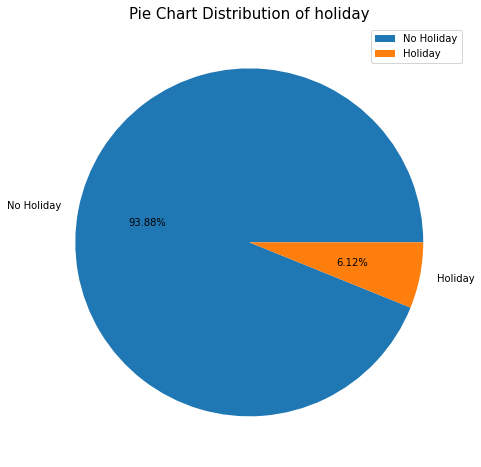

In [174]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(), labels=['No Holiday', 'Holiday'], autopct='%0.2f%%')
plt.title("Pie Chart Distribution of holiday", fontsize=15)
plt.legend()
plt.show();

## One Hot Encoding

In [175]:
cat_col = ['Type']
data_cat = data[cat_col].copy()

In [176]:
data_cat.tail()

,Type
Date,
2012-10-26,A
2012-10-26,C
2012-10-26,A
2012-10-26,A
2012-10-26,B


In [177]:
data_cat = pd.get_dummies(data_cat, columns=cat_col)

In [178]:
data_cat.head()

,Type_A,Type_B,Type_C
Date,,,
2010-02-05,1,0,0
2010-02-05,0,1,0
2010-02-05,0,1,0
2010-02-05,1,0,0
2010-02-05,0,1,0


In [179]:
data.shape

(374247, 20)

In [180]:
data = pd.concat([data, data_cat], axis=1)

In [181]:
data.shape

(374247, 23)

In [182]:
data.drop(columns=cat_col, inplace=True)

In [183]:
data.drop(columns=['Date'], inplace=True)

In [184]:
data.shape

(374247, 21)

In [185]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,...,Day,max,min,mean,median,std,Total_MarkDown,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,...,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0,1,0,0
2010-02-05,9,97,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,...,5,766.93,-9.92,372.655556,371.05,290.954675,0.0,0,1,0
2010-02-05,9,85,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,...,5,2512.14,110.56,876.629441,824.04,307.436056,0.0,0,1,0
2010-02-05,8,80,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,...,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0,1,0,0
2010-02-05,9,55,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,...,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0,0,1,0


## Data Normalization

In [186]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [187]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))

def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [188]:
data = normalization(data.copy(),num_col)

In [189]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,...,Day,max,min,mean,median,std,Total_MarkDown,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,...,5,0.088635,0.253530,0.208157,0.173215,0.138276,0.0,1,0,0
2010-02-05,9,97,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.001180,0.064648,0.004499,0.004767,0.004083,0.0,0,1,0
2010-02-05,9,85,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.003866,0.066212,0.009135,0.008968,0.004314,0.0,0,1,0
2010-02-05,8,80,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,...,5,0.018453,0.161046,0.085594,0.086290,0.010611,0.0,1,0,0
2010-02-05,9,55,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.044887,0.126993,0.080242,0.071542,0.054362,0.0,0,1,0


### Correlation Matrix

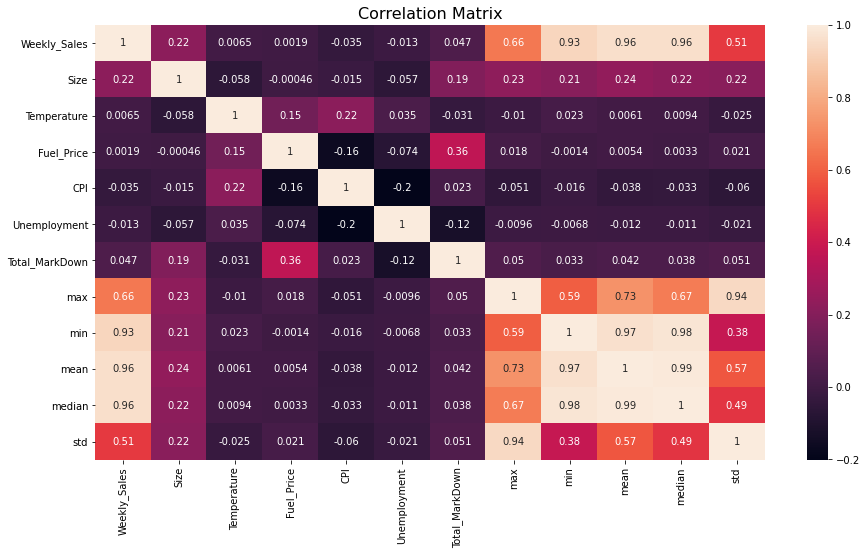

In [190]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

In [191]:
data.to_csv('./datasets/final_data.csv')

## -------------------------------------------- Notebook End ----------------------------------------------